# Method: Confidence Regions for Level Sets (Incorrect Implementation)

#### Note: Method here is incorrect because I don't correct for the bootstrap survival function not being completely drawn on the domain of the empirical survival function

A notebook to explore some alternative UQ methods to the bootstrap that give confidence regions/confidence tubes, as opposed to confidence intervals for fixed coordinates

In [2]:
library(mvtnorm)
library(ks)
library(dplyr)
library(ggplot2)
library(ismev)
library(gridExtra)
library(repr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: mgcv

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-40. For overview type 'help("mgcv-package")'.


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [3]:
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/orig_isolines.R')
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/utils.R')
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/confidenceRegions.R')


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [7]:
res_path <- '/global/homes/j/jbbutler/isolines_uq/results/regions/wrong_procedure'

Mammen and Polonik (2013) provide the theory and the method, Coblenz, Dyckerhodd, and Grothe (2018) was used to help interpret and aid in implementation (kind of a tl;dr)

### Toy Dataset for Asymptotic Dependence: Bivariate t (base isolines only)

#### Playing around with the $\beta_{n}$ parameter

Before doing any extrapolations into the tail, I'm just seeing how slowly decaying I can make $\beta_{n}$ before it fails to make a true confidence region, for different starting isolines.

#### Base $p = 0.05$

In [37]:
n <- 3000
t_dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
gridsize <- 250
alpha <- 0.05
p <- 0.01
beta_n <- function(n) (1/n)^(1/2)
B <- 500
out <- drawBaseRegion(t_dat, gridsize, alpha, p, beta_n, B)

In [42]:
tol <- 0.0003
isoline <- drawBivtIsoline(p = p, tol = tol, grid = out$grid)

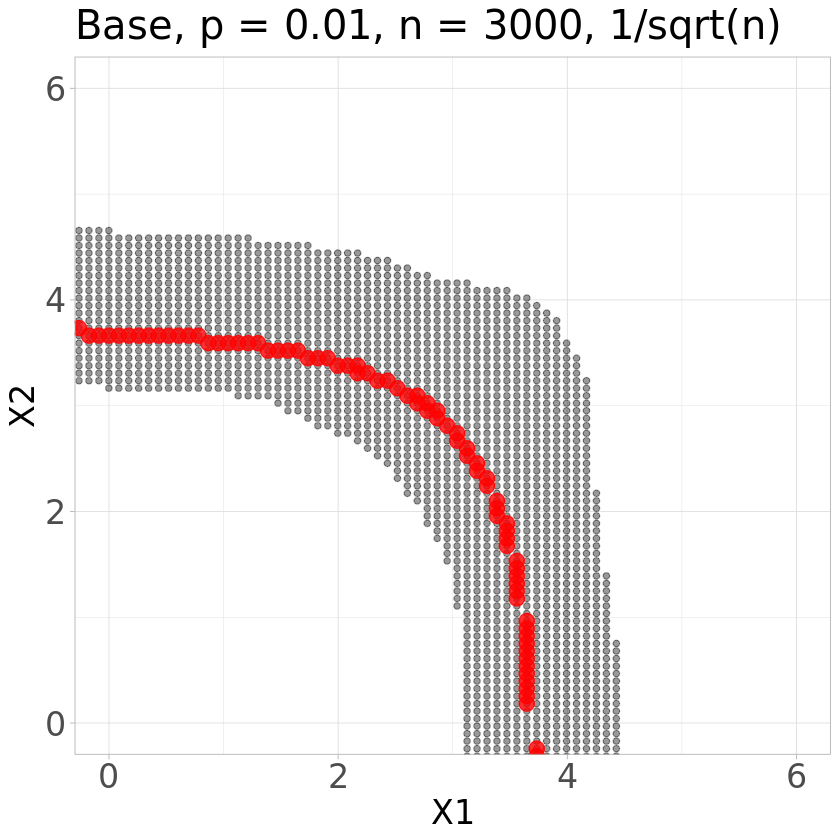

In [43]:
beta_n_plt1 <- ggplot() + 
geom_point(dat = out$conf_region, aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = isoline, aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 6), xlim = c(0, 6)) + ggtitle(paste0('Base,', ' p = ', p, ', n = ', n, ', 1/sqrt(n)')) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
beta_n_plt1

In [ ]:
gridsize <- 500
alpha <- 0.05
p <- 0.05
beta_n <- function(n) (1/n)^(3/7)
B <- 500
out <- drawBaseRegion(t_dat, gridsize, alpha, p, beta_n, B)

In [ ]:
beta_n_plt2 <- ggplot() + 
geom_point(dat = out$conf_region, aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = isoline, aes(x = Var1, y = Var2), col = 'red', size = 4, alpha = 0.8) + coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base,', ' p = ', p, ', n = ', n, ', (1/n)^3/7')) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))

In [ ]:
beta_n_plt2

In [ ]:
gridsize <- 500
alpha <- 0.05
p <- 0.05
beta_n <- function(n) (1/n)^(2/5)
B <- 500
out <- drawBaseRegion(t_dat, gridsize, alpha, p, beta_n, B)

In [ ]:
beta_n_plt3 <- ggplot() + 
geom_point(dat = out$conf_region, aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = isoline, aes(x = Var1, y = Var2), col = 'red', size = 4, alpha = 0.8) + coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base,', ' p = ', p, ', n = ', n, ', (1/n)^2/5')) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))

In [ ]:
beta_n_plt3

In [ ]:
gridsize <- 500
alpha <- 0.05
p <- 0.05
beta_n <- function(n) (1/n)^(3/8)
B <- 500
out <- drawBaseRegion(t_dat, gridsize, alpha, p, beta_n, B)

In [ ]:
beta_n_plt4 <- ggplot() + 
geom_point(dat = out$conf_region, aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = isoline, aes(x = Var1, y = Var2), col = 'red', size = 4, alpha = 0.8) + coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base,', ' p = ', p, ', n = ', n, ', (1/n)^3/8')) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
beta_n_plt4

In [ ]:
gridsize <- 500
alpha <- 0.05
p <- 0.05
beta_n <- function(n) (1/n)^(1/3)
B <- 500
out <- drawBaseRegion(t_dat, gridsize, alpha, p, beta_n, B)

In [ ]:
beta_n_plt5 <- ggplot() + 
geom_point(dat = out$conf_region, aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = isoline, aes(x = Var1, y = Var2), col = 'red', size = 4, alpha = 0.8) + coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base,', ' p = ', p, ', n = ', n, ', (1/n)^1/3')) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
beta_n_plt5

In [ ]:
gridsize <- 500
alpha <- 0.05
p <- 0.05
beta_n <- function(n) (1/n)^(1/4)
B <- 500
out <- drawBaseRegion(t_dat, gridsize, alpha, p, beta_n, B)

In [ ]:
beta_n_plt6 <- ggplot() + 
geom_point(dat = out$conf_region, aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = isoline, aes(x = Var1, y = Var2), col = 'red', size = 4, alpha = 0.8) + coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base,', ' p = ', p, ', n = ', n, ', (1/n)^1/4')) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
beta_n_plt6

### Thing I noticed: seems that the method only works and draws actual nontrivial regions when q is chosen such that $(1/n)^{q} \leq p$, or equivalently when $q \geq \log_{1/n}(p)$

#### Base $p = 0.01$

In [4]:
gridsize <- 500
alpha <- 0.05
p <- 0.05
beta_n <- function(n) 1/sqrt(n)
B <- 500
out <- drawBaseRegion(t_dat, gridsize, alpha, p, beta_n, B)

ERROR: Error in ks.defaults(x = x, w = w, binned = binned, bgridsize = bgridsize, : object 't_dat' not found


In [51]:
list.files(path = '/global/u1/j/jbbutler/isolines_uq/results/regions/bases/')

[1] "1000n_500B_0.05pbase_0.333q_bivt_confregs"
[2] "1000n_500B_0.05pbase_0.5q_bivt_confregs"  
[3] "3000n_500B_0.05pbase_0.5q_bivt_confregs"

In [ ]:
tol <- 0.0003
isoline <- drawBivtIsoline(p = p, tol = tol, grid = out$grid)

In [ ]:
beta_n_plt8 <- ggplot() + 
geom_point(dat = out$conf_region, aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = isoline, aes(x = Var1, y = Var2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base,', ' p = ', p, ', n = ', n, ', 1/sqrt(n)')) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
beta_n_plt8

In [ ]:
gridsize <- 500
alpha <- 0.05
p <- 0.01
beta_n <- function(n) 1/n
B <- 500
out <- drawBaseRegion(t_dat, gridsize, alpha, p, beta_n, B)

In [ ]:
tol <- 0.0003
isoline <- drawBivtIsoline(p = p, tol = tol, grid = out$grid)

In [ ]:
beta_n_plt9 <- ggplot() + 
geom_point(dat = out$conf_region, aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = isoline, aes(x = Var1, y = Var2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base,', ' p = ', p, ', n = ', n, ', 1/n')) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
beta_n_plt9

#### Base $p = 0.005$

In [ ]:
gridsize <- 500
alpha <- 0.05
p <- 0.005
beta_n <- function(n) 1/n
B <- 500
out <- drawBaseRegion(t_dat, gridsize, alpha, p, beta_n, B)

In [ ]:
tol <- 0.0001
isoline <- drawBivtIsoline(p = p, tol = tol, grid = out$grid)

In [ ]:
beta_n_plt10 <- ggplot() + 
geom_point(dat = out$conf_region, aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = isoline, aes(x = Var1, y = Var2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 7), xlim = c(0, 7)) + ggtitle(paste0('Base,', ' p = ', p, ', n = ', n, ', 1/n')) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
beta_n_plt10


## Coverage Rates

### Base Isoline, No Projections

First, we draw confidence regions for the base isolines (i.e., do no projections, and get coverage rates as a function of sample size). Interesting that it's all 100% coverage.

#### n = 1000

In [ ]:
confreg_res <- readRDS(paste0(res_path, '1000n_500B_0.05p_bivt_confregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))


In [ ]:
cov

In [ ]:
i <- 490

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[1]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base, ', 'p = ', confreg_res[[i]][[1]]$p, ', n = ', nrow(confreg_res[[i]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

#### n = 3000

In [ ]:
confreg_res <- readRDS(paste0(res_path, '3000n_500B_0.05p_bivt_confregs.RData'))

In [ ]:
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
i <- 150

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[1]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base, ', 'p = ', confreg_res[[i]][[1]]$p, ', n = ', nrow(confreg_res[[i]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

#### n = 5000

In [ ]:
confreg_res <- readRDS(paste0(res_path, '5000n_500B_0.05p_bivt_confregs.RData'))

In [ ]:
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
i <- 300

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[1]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base, ', 'p = ', confreg_res[[i]][[1]]$p, ', n = ', nrow(confreg_res[[i]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

#### n = 10000

In [ ]:
confreg_res <- readRDS(paste0(res_path, '10000n_500B_0.05p_bivt_confregs.RData'))

In [ ]:
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
i <- 310

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[1]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base, ', 'p = ', confreg_res[[i]][[1]]$p, ', n = ', nrow(confreg_res[[i]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

### Projected Isolines

#### Base: $p = 0.05$, Extrapolate to: $p = 0.01$, $\beta_{n} = 1/\sqrt{n}$

#### n = 1000

In [ ]:
confreg_res <- readRDS(paste0(res_path, '1000n_500B_0.05pbase_0.01pproj_bivt_projconfregs.RData'))


In [ ]:
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
i <- 7

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[3]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Projected, ', 'p = ', confreg_res[[i]][[1]]$proj_p, ', n = ', nrow(confreg_res[[i]][[1]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [ ]:
i <- 100

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[3]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 5), xlim = c(0, 5)) + ggtitle(paste0('Projected, ', 'p = ', confreg_res[[i]][[1]]$proj_p, ', n = ', nrow(confreg_res[[i]][[1]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

#### n = 3000

In [ ]:
confreg_res <- readRDS(paste0(res_path, '3000n_500B_0.05pbase_0.01pproj_bivt_projconfregs.RData'))


In [ ]:
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
i <- 10

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[3]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Projected, ', 'p = ', confreg_res[[i]][[1]]$proj_p, ', n = ', nrow(confreg_res[[i]][[1]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [ ]:
i <- 260

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[3]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Projected, ', 'p = ', confreg_res[[i]][[1]]$proj_p, ', n = ', nrow(confreg_res[[i]][[1]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

#### n = 5000

In [ ]:
confreg_res <- readRDS(paste0(res_path, '5000n_500B_0.05pbase_0.01pproj_bivt_projconfregs.RData'))


In [ ]:
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
i <- 15

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[3]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Projected, ', 'p = ', confreg_res[[i]][[1]]$proj_p, ', n = ', nrow(confreg_res[[i]][[1]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [ ]:
i <- 45

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[3]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Projected, ', 'p = ', confreg_res[[i]][[1]]$proj_p, ', n = ', nrow(confreg_res[[i]][[1]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

#### n = 10000

In [ ]:
confreg_res <- readRDS(paste0(res_path, '10000n_500B_0.05pbase_0.01pproj_bivt_projconfregs.RData'))


In [ ]:
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

#### n = 15000

In [ ]:
confreg_res <- readRDS(paste0(res_path, '15000n_500B_0.05pbase_0.01pproj_bivt_projconfregs.RData'))

In [ ]:
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
i <- 15

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[3]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Projected, ', 'p = ', confreg_res[[i]][[1]]$proj_p, ', n = ', nrow(confreg_res[[i]][[1]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

#### n = 20000

In [ ]:
confreg_res <- readRDS(paste0(res_path, '20000n_500B_0.05pbase_0.01pproj_bivt_projconfregs.RData'))


In [ ]:
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
i <- 355

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[3]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Projected, ', 'p = ', confreg_res[[i]][[1]]$proj_p, ', n = ', nrow(confreg_res[[i]][[1]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

#### n = 25000

In [ ]:
confreg_res <- readRDS(paste0(res_path, '25000n_500B_0.05pbase_0.01pproj_bivt_projconfregs.RData'))


In [ ]:
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov


In [ ]:
i <- 245

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[3]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Projected, ', 'p = ', confreg_res[[i]][[1]]$proj_p, ', n = ', nrow(confreg_res[[i]][[1]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

#### Base: $p = 0.05$, Extrapolate to: $p = 0.005$, $\beta_{n} = 1/\sqrt{n}$

In [ ]:
confreg_res <- readRDS(paste0(res_path, '1000n_500B_0.05pbase_0.005pproj_bivt_projconfregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
confreg_res <- readRDS(paste0(res_path, '3000n_500B_0.05pbase_0.005pproj_bivt_projconfregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
confreg_res <- readRDS(paste0(res_path, '5000n_500B_0.05pbase_0.005pproj_bivt_projconfregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
confreg_res <- readRDS(paste0(res_path, '10000n_500B_0.05pbase_0.005pproj_bivt_projconfregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
confreg_res <- readRDS(paste0(res_path, '15000n_500B_0.05pbase_0.005pproj_bivt_projconfregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
confreg_res <- readRDS(paste0(res_path, '20000n_500B_0.05pbase_0.005pproj_bivt_projconfregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
confreg_res <- readRDS(paste0(res_path, '25000n_500B_0.05pbase_0.005pproj_bivt_projconfregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

#### Base: $p = 0.05$, Extrapolate to: $p = 0.005$, $\beta_{n} = (1/n)^{3/8}$

In [ ]:
confreg_res <- readRDS(paste0(res_path, '3000n_500B_0.05pbase_0.005pproj_0.375q_bivt_projconfregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
i <- 275

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[3]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 6), xlim = c(0, 6)) + ggtitle(paste0('Projected, ', 'p = ', confreg_res[[i]][[1]]$proj_p, ', n = ', nrow(confreg_res[[i]][[1]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [ ]:
confreg_res <- readRDS(paste0(res_path, '5000n_500B_0.05pbase_0.005pproj_0.375q_bivt_projconfregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
i <- 295

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[3]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 6), xlim = c(0, 6)) + ggtitle(paste0('Projected, ', 'p = ', confreg_res[[i]][[1]]$proj_p, ', n = ', nrow(confreg_res[[i]][[1]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [ ]:
confreg_res <- readRDS(paste0(res_path, '10000n_500B_0.05pbase_0.005pproj_0.375q_bivt_projconfregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
i <- 400

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[3]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 6), xlim = c(0, 6)) + ggtitle(paste0('Projected, ', 'p = ', confreg_res[[i]][[1]]$proj_p, ', n = ', nrow(confreg_res[[i]][[1]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [ ]:
confreg_res <- readRDS(paste0(res_path, '15000n_500B_0.05pbase_0.005pproj_0.375q_bivt_projconfregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
i <- 450

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[3]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 6), xlim = c(0, 6)) + ggtitle(paste0('Projected, ', 'p = ', confreg_res[[i]][[1]]$proj_p, ', n = ', nrow(confreg_res[[i]][[1]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [ ]:
confreg_res <- readRDS(paste0(res_path, '20000n_500B_0.05pbase_0.005pproj_0.375q_bivt_projconfregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
i <- 25

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[3]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 6), xlim = c(0, 6)) + ggtitle(paste0('Projected, ', 'p = ', confreg_res[[i]][[1]]$proj_p, ', n = ', nrow(confreg_res[[i]][[1]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [ ]:
confreg_res <- readRDS(paste0(res_path, '25000n_500B_0.05pbase_0.005pproj_0.375q_bivt_projconfregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

In [ ]:
i <- 175

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[3]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 6), xlim = c(0, 6)) + ggtitle(paste0('Projected, ', 'p = ', confreg_res[[i]][[1]]$proj_p, ', n = ', nrow(confreg_res[[i]][[1]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [ ]:
confreg_res <- readRDS(paste0(res_path, '15000n_500B_0.05pbase_0.01pproj_0.5q_bivt_projconfregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

# Confidence Region for Level Sets (Incorrect Implementation)

Ok, so I think I had an error in how I did the method (was taking the supremum over all points within some neighborhood of the isoline estimate from the BOOTSTRAP survival function as opposed to the estimated survival function for that dataset, and I think we need the latter). Just fixed, and am running again, but the following cells show some issues I've been running into, primarily with getting an upper bound on the confidence region. It would be worthwhile to think about what is causing a boundary to form or not, and what that means and how it all relates to $\beta_{n}$, etc.

#### NOTE: this implementation is still incorrect, because I didn't understand the input of the `kcde` function. The issue can be seen with the large bias of the estimated isolines, even as $n \to \$

In [8]:
base_path <- paste0(res_path, 'bases/')

#### $\beta_{n} = (1/n)^{1/4}$

#### Assessment of Results:

Seems like we get some undercoverage as n gets large. This might indicate that $\beta_{n} = n^{-1/4}$ decreases a little too quickly for large $n$, and that we need to choose a $\beta_{n}$ that decreases less quickly for large $n$. Possibly try $\beta_{n} = n^{-1/5}$.

In [9]:
confreg_res <- readRDS(paste0(base_path, '1000n_500B_0.05pbase_0.25q_bivt_confregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

Warning message in gzfile(file, "rb"):
“cannot open compressed file '/global/homes/j/jbbutler/isolines_uq/results/regions/bases/1000n_500B_0.05pbase_0.25q_bivt_confregs.RData', probable reason 'No such file or directory'”


ERROR: Error in gzfile(file, "rb"): cannot open the connection


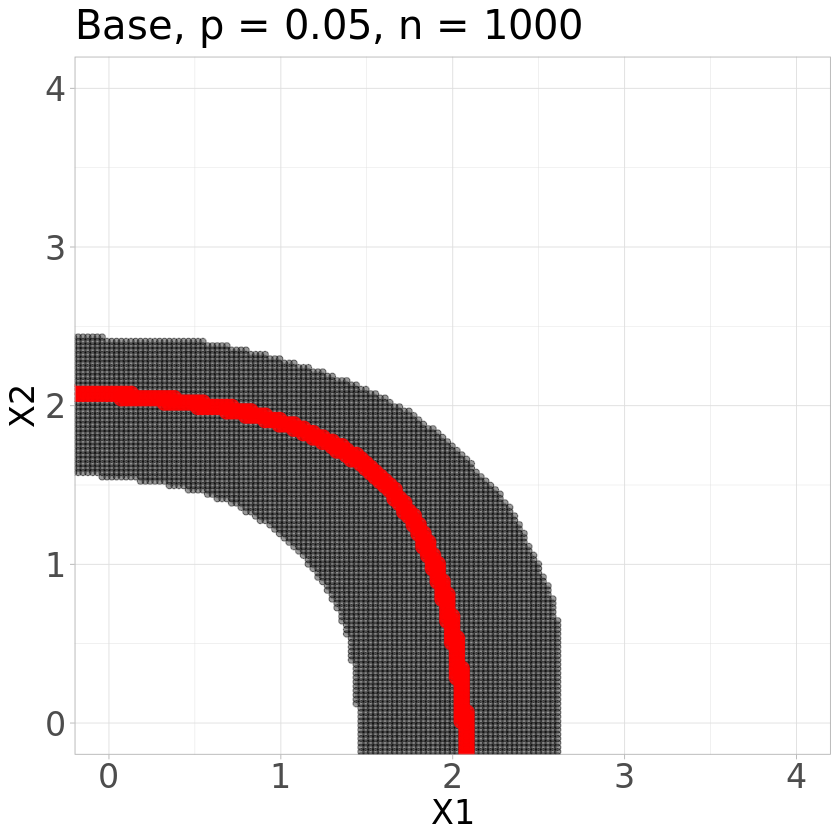

In [6]:
i <- 45

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[1]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', size = 4, alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base, ', 'p = ', confreg_res[[i]][[1]]$p, ', n = ', nrow(confreg_res[[i]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [7]:
confreg_res <- readRDS(paste0(base_path, '3000n_500B_0.05pbase_0.25q_bivt_confregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

[1] 1

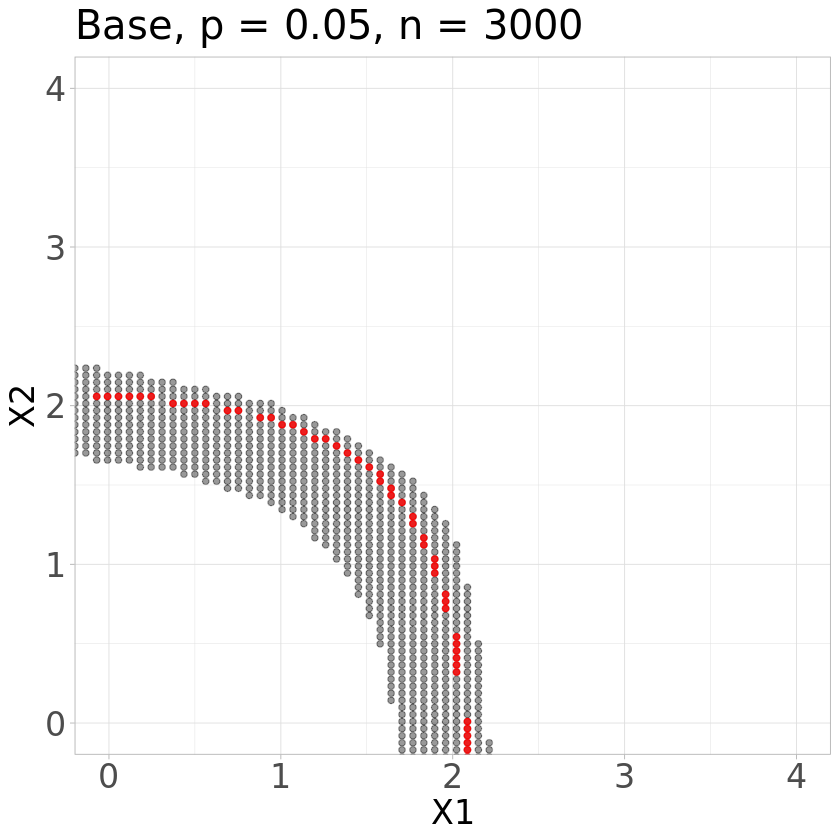

In [27]:
i <- 100

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[1]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base, ', 'p = ', confreg_res[[i]][[1]]$p, ', n = ', nrow(confreg_res[[i]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [9]:
confreg_res <- readRDS(paste0(base_path, '5000n_500B_0.05pbase_0.25q_bivt_confregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

[1] 0.998

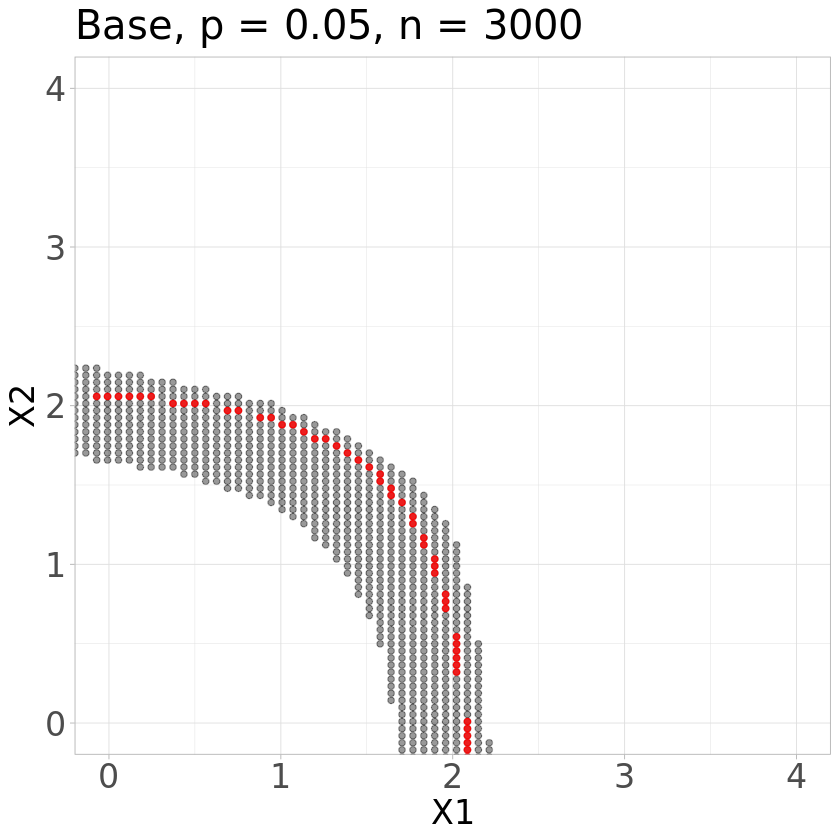

In [26]:
i <- 100

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[1]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base, ', 'p = ', confreg_res[[i]][[1]]$p, ', n = ', nrow(confreg_res[[i]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [11]:
confreg_res <- readRDS(paste0(base_path, '10000n_500B_0.05pbase_0.25q_bivt_confregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

[1] 0.928

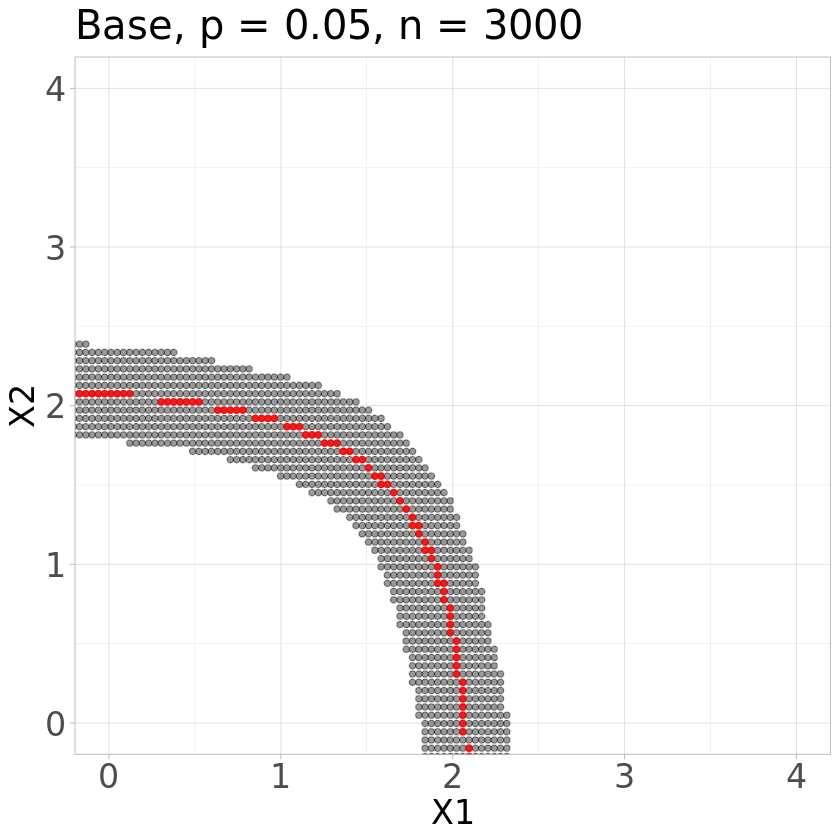

In [25]:
i <- 460

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[1]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base, ', 'p = ', confreg_res[[i]][[1]]$p, ', n = ', nrow(confreg_res[[i]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [13]:
confreg_res <- readRDS(paste0(base_path, '15000n_500B_0.05pbase_0.25q_bivt_confregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

[1] 0.862

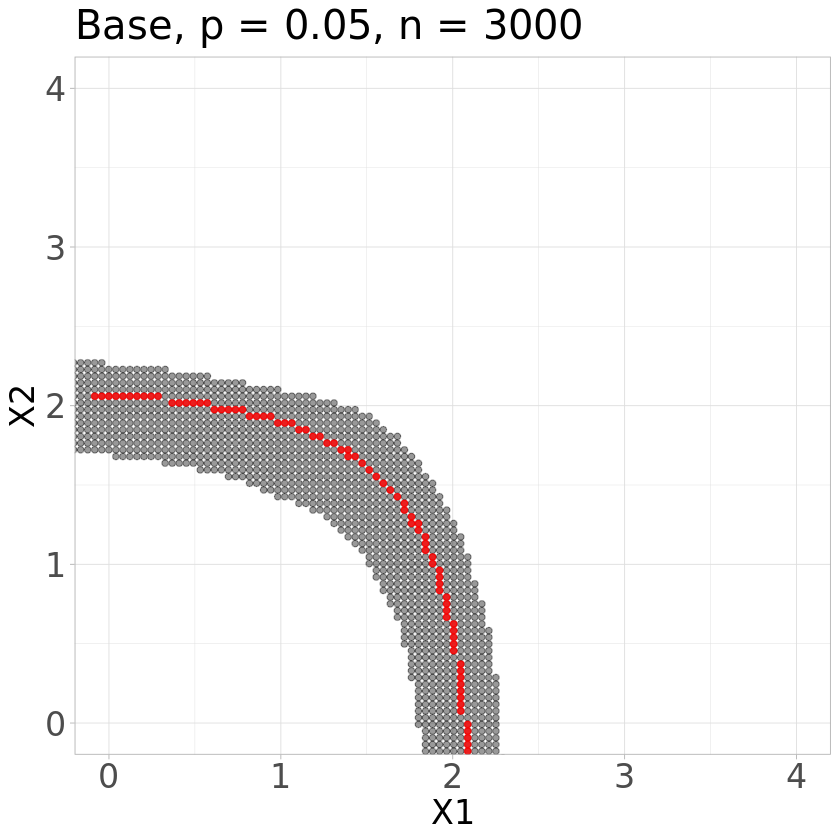

In [24]:
i <- 400

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[1]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base, ', 'p = ', confreg_res[[i]][[1]]$p, ', n = ', nrow(confreg_res[[i]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

#### $\beta_{n} = (1/n)^{1/3}$

#### Assessment of Results: 

Seems weird that the estimated isolines all appear to be biased downwards? The only thing that changed from last time was the computations for $\hat{b}_{n}$, but regardless of this value it seems that the estimations are all biased low, more so than they were for the previous method. $\hat{b}_{n}$ shouldn't change anything, maybe it's the grid???

In [11]:
confreg_res <- readRDS(paste0(res_path, '1000n_500B_0.05pbase_0.333q_bivt_confregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

[1] 1

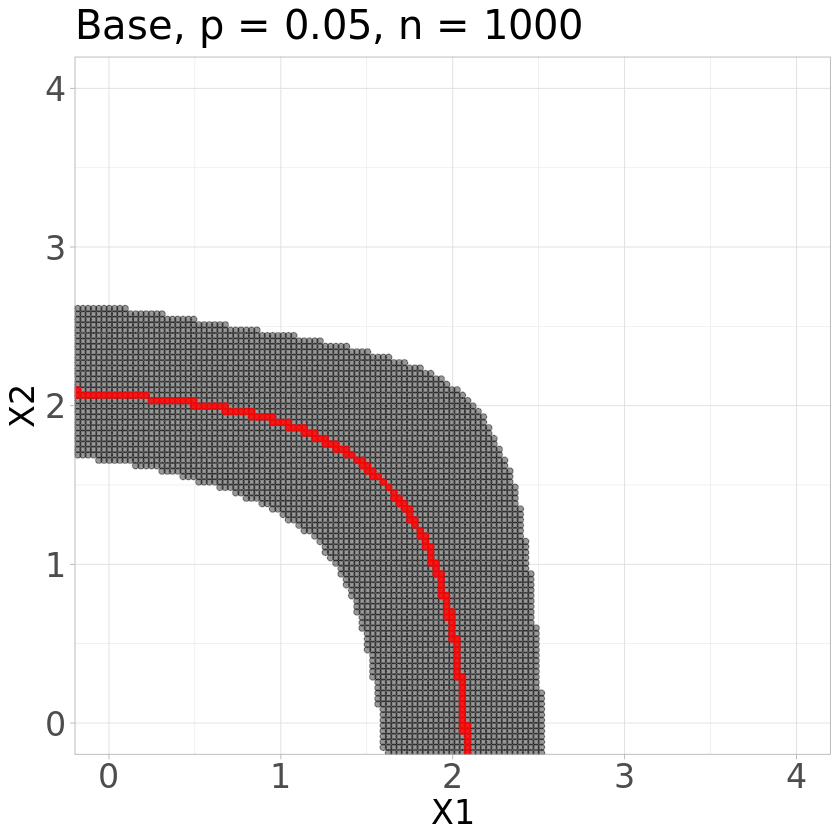

In [18]:
i <- 140

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[1]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base, ', 'p = ', confreg_res[[i]][[1]]$p, ', n = ', nrow(confreg_res[[i]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [18]:
confreg_res <- readRDS(paste0(base_path, '3000n_500B_0.05pbase_0.333333333333333q_bivt_confregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

[1] 0.992

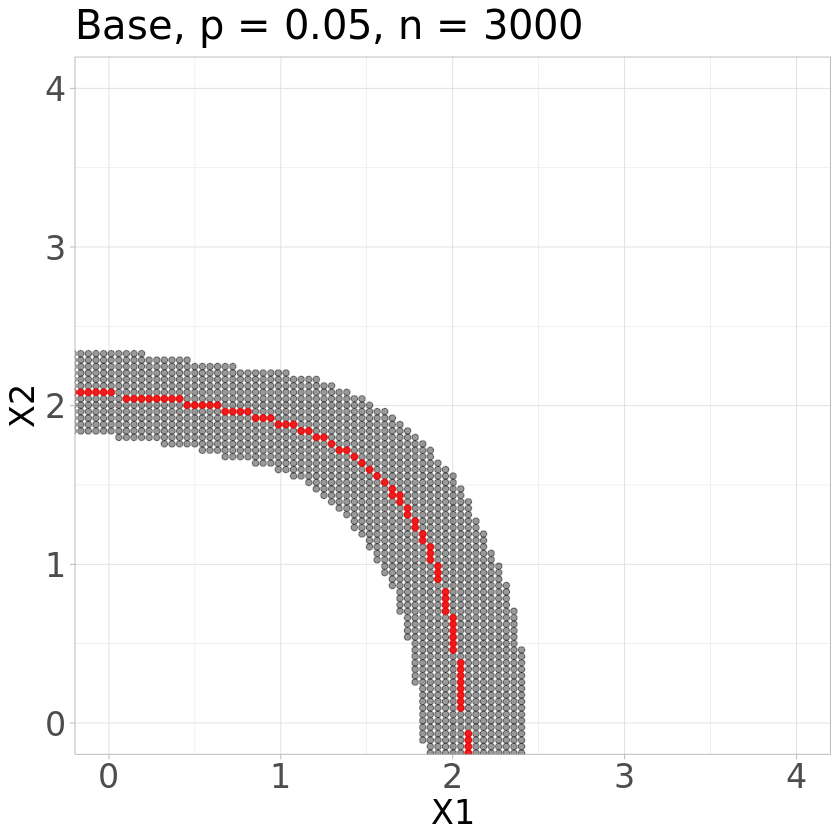

In [22]:
i <- 45

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[1]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base, ', 'p = ', confreg_res[[i]][[1]]$p, ', n = ', nrow(confreg_res[[i]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [28]:
confreg_res <- readRDS(paste0(base_path, '5000n_500B_0.05pbase_0.333333333333333q_bivt_confregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

[1] 0.96

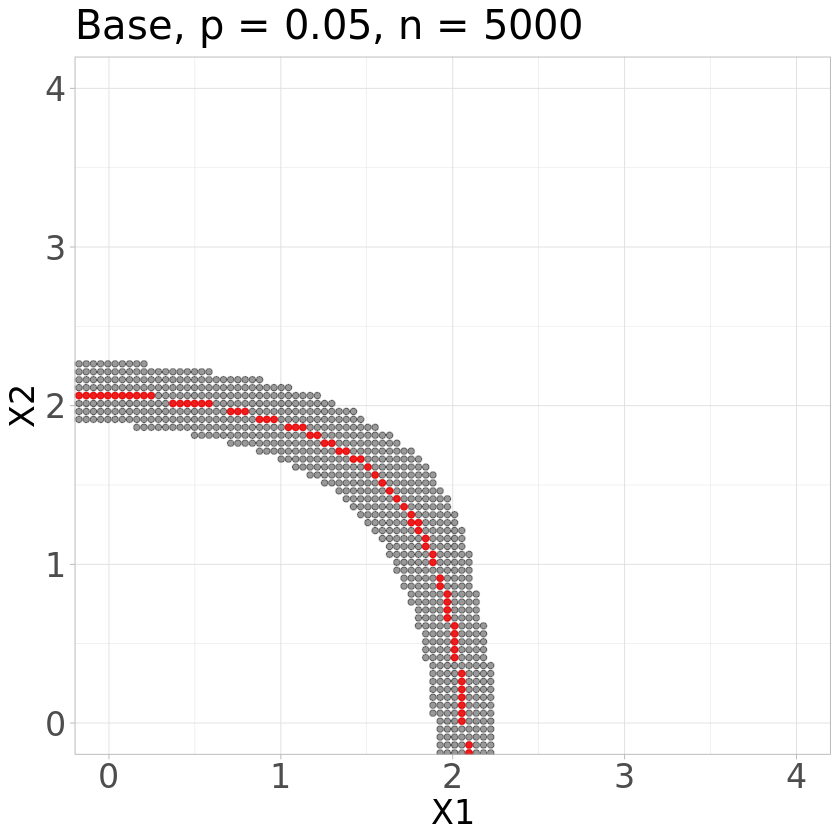

In [39]:
i <- 115

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[1]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base, ', 'p = ', confreg_res[[i]][[1]]$p, ', n = ', nrow(confreg_res[[i]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [40]:
confreg_res <- readRDS(paste0(base_path, '10000n_500B_0.05pbase_0.333333333333333q_bivt_confregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

[1] 0.7

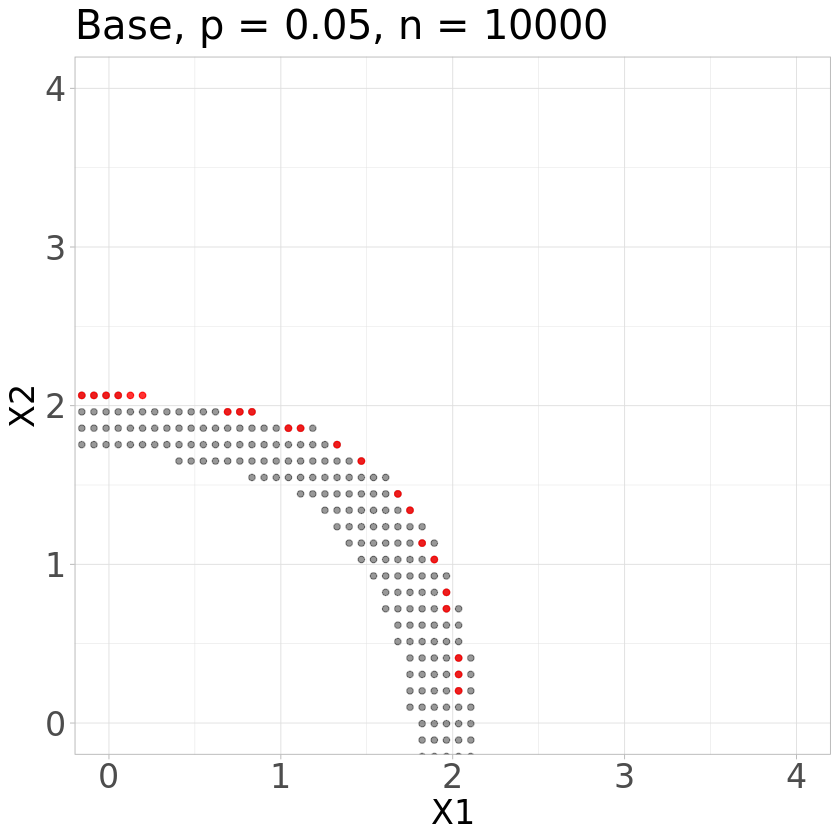

In [57]:
i <- 304

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[1]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base, ', 'p = ', confreg_res[[i]][[1]]$p, ', n = ', nrow(confreg_res[[i]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [58]:
confreg_res <- readRDS(paste0(base_path, '15000n_500B_0.05pbase_0.333333333333333q_bivt_confregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

[1] 0.382

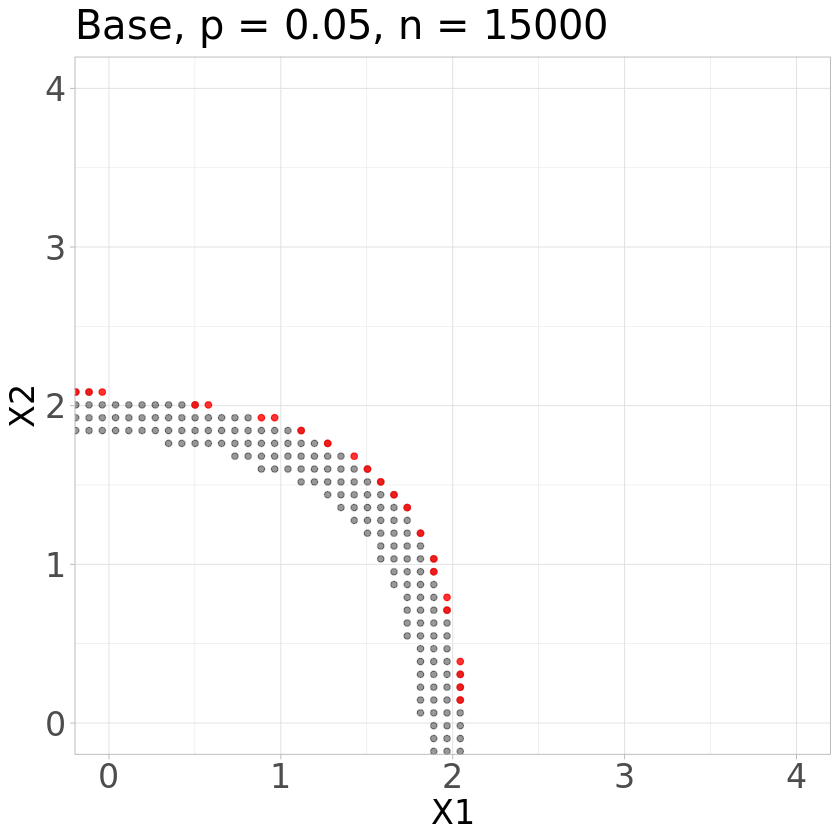

In [67]:
i <- 180

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[1]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base, ', 'p = ', confreg_res[[i]][[1]]$p, ', n = ', nrow(confreg_res[[i]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

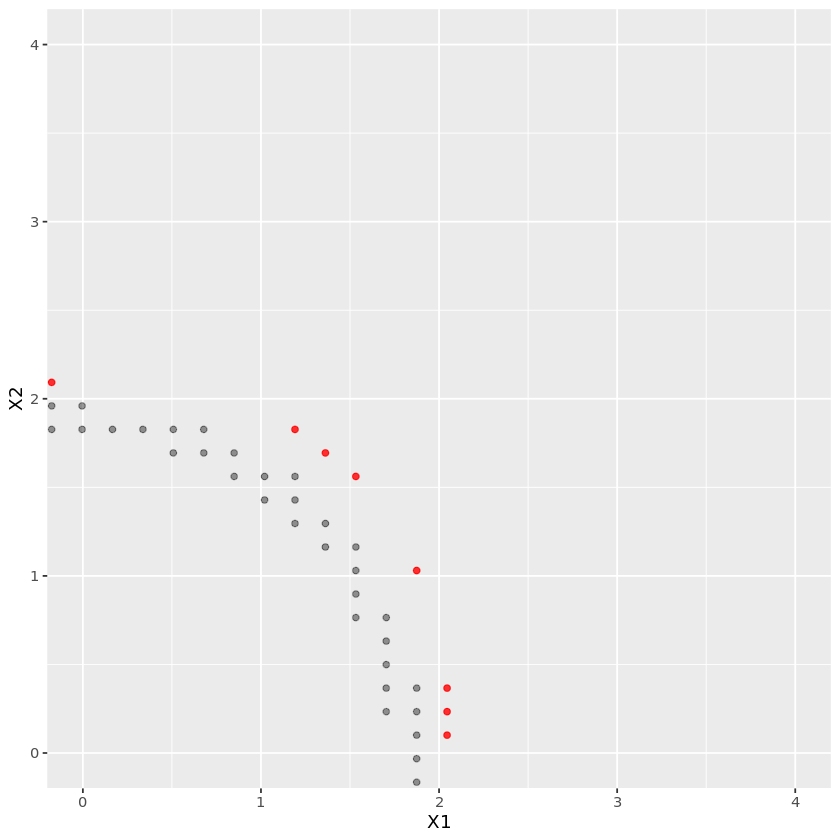

In [87]:
i <- 190

upper <- confreg_res[[i]][[1]]$grid[confreg_res[[i]][[1]]$hhat_vals >= -confreg_res[[i]][[1]]$bhat/5, ]
lower <- confreg_res[[i]][[1]]$grid[confreg_res[[i]][[1]]$hhat_vals > confreg_res[[i]][[1]]$bhat/5, ]
reg <- setdiff(upper, lower)

ggplot() + geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
geom_point(dat = reg, aes(x = X1, y = X2), alpha = 0.4) + coord_cartesian(ylim=c(0, 4), xlim = c(0, 4))


#### $\beta_{n} = n^{-1/2}$

#### Assessment of Results:

Once again, it seems that $n$ is decreasing too quickly such that by the time we get to large $n$, $\hat{b}_{n}$ is already so small that the uncertainty region is too small to contain the full isoline. It also seems that the estimated isolines are all biased low compared to the true isoline. I'm not sure if this is because we are using a Gaussian kernel estimate for a heavy tailed distribution, and we are too far into the tail to get good results (would make sense because our estimates are biased low, we're trying to estimate an isoline in a heavy-tailed distribution too far out away from the mass of data). But we also did this with the incorrect procedure earlier, and that didn't seem to have as much bias.. very strange.

In [89]:
confreg_res <- readRDS(paste0(base_path, '1000n_500B_0.05pbase_0.5q_bivt_confregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

[1] 0.996

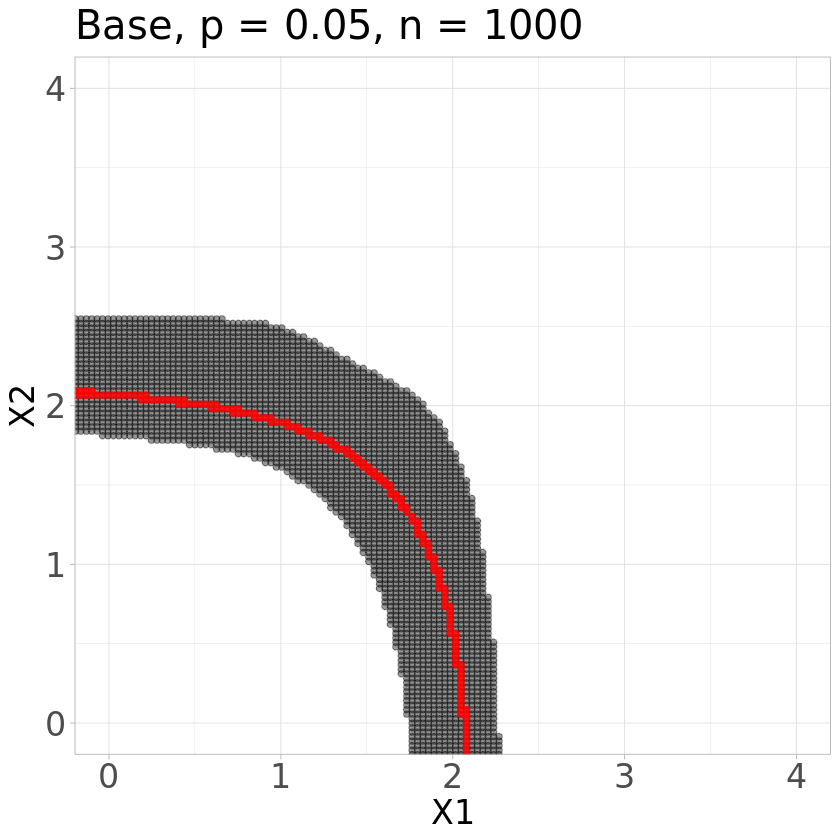

In [92]:
i <- 204

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[1]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base, ', 'p = ', confreg_res[[i]][[1]]$p, ', n = ', nrow(confreg_res[[i]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [93]:
confreg_res <- readRDS(paste0(base_path, '3000n_500B_0.05pbase_0.5q_bivt_confregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

[1] 0.91

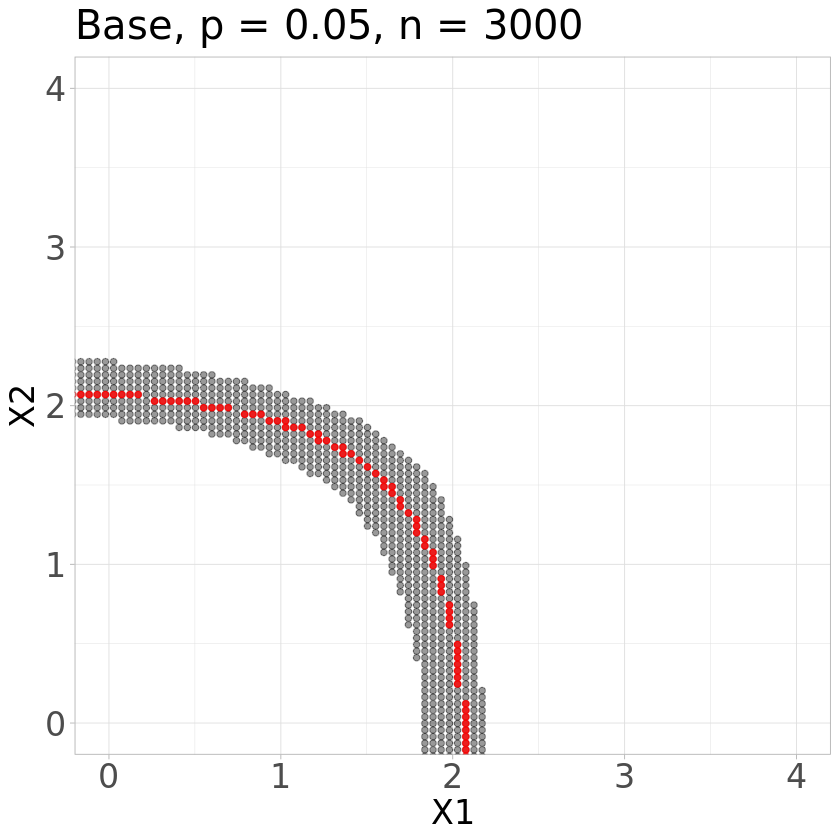

In [100]:
i <- 90

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[1]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base, ', 'p = ', confreg_res[[i]][[1]]$p, ', n = ', nrow(confreg_res[[i]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [101]:
confreg_res <- readRDS(paste0(base_path, '5000n_500B_0.05pbase_0.5q_bivt_confregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

[1] 0.736

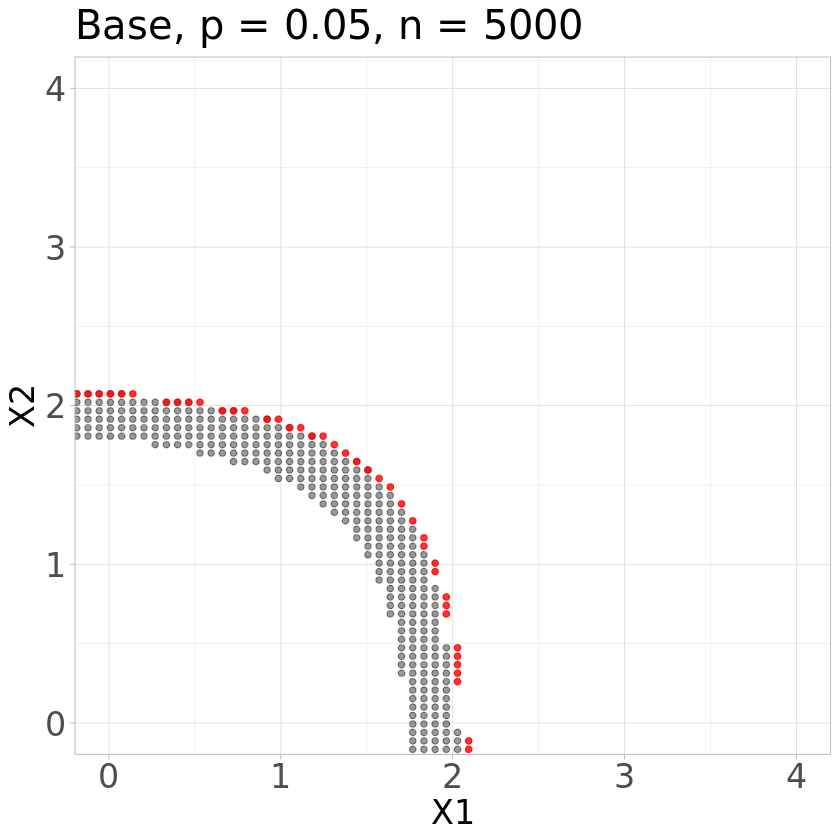

In [114]:
i <- 260

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[1]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base, ', 'p = ', confreg_res[[i]][[1]]$p, ', n = ', nrow(confreg_res[[i]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [115]:
confreg_res <- readRDS(paste0(base_path, '10000n_500B_0.05pbase_0.5q_bivt_confregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

[1] 0.242

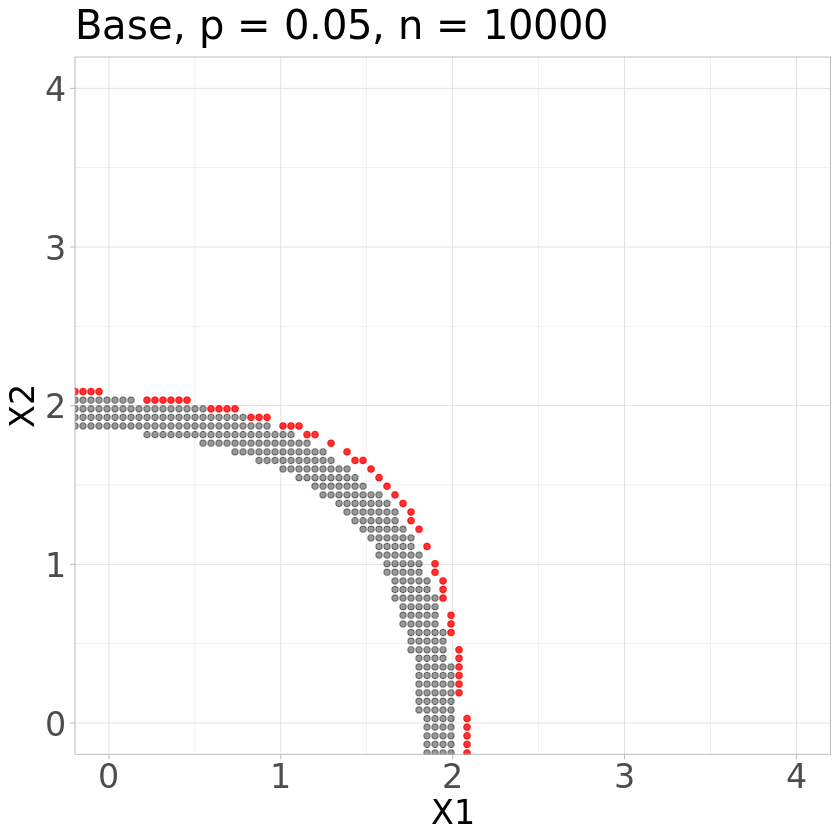

In [125]:
i <- 75

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[1]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base, ', 'p = ', confreg_res[[i]][[1]]$p, ', n = ', nrow(confreg_res[[i]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt

In [127]:
confreg_res <- readRDS(paste0(base_path, '15000n_500B_0.05pbase_0.5q_bivt_confregs.RData'))
cov <- sum(sapply(confreg_res, function(x){x[[3]]}))/length(sapply(confreg_res, function(x){x[[3]]}))
cov

[1] 0.066

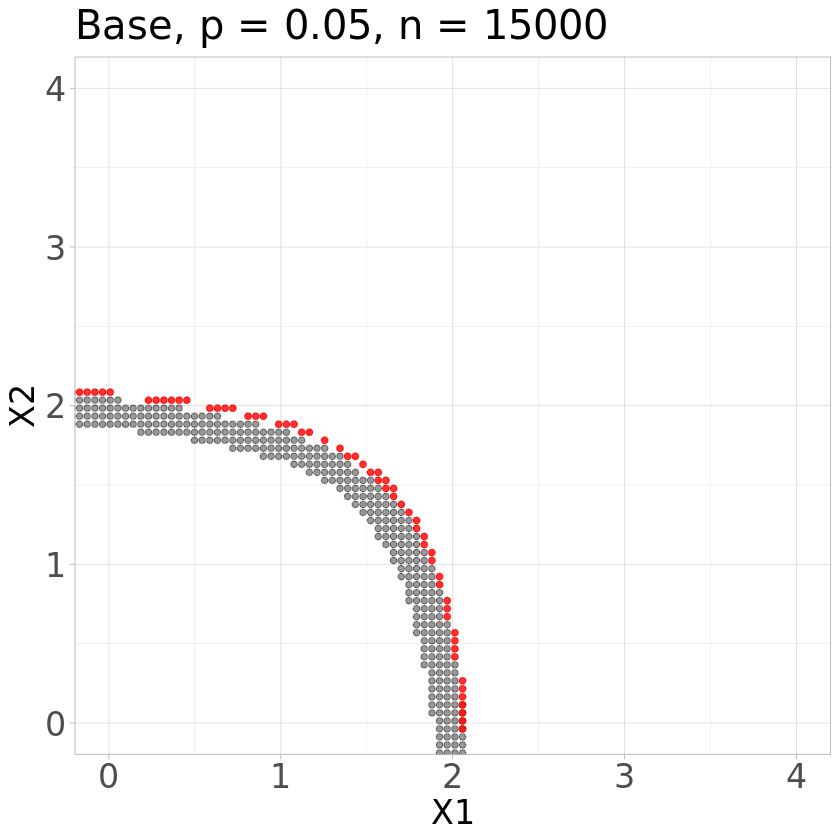

In [138]:
i <- 270

orig_plt <- ggplot() + 
geom_point(dat = confreg_res[[i]][[1]][[1]], aes(x = X1, y = X2), alpha = 0.4) + 
geom_point(dat = confreg_res[[i]][[2]], aes(x = X1, y = X2), col = 'red', alpha = 0.8) + 
coord_cartesian(ylim=c(0, 4), xlim = c(0, 4)) + ggtitle(paste0('Base, ', 'p = ', confreg_res[[i]][[1]]$p, ', n = ', nrow(confreg_res[[i]][[1]][[3]]))) + theme_light() + 
xlab('X1') + ylab('X2') + theme(axis.title = element_text(size = 20), axis.text = element_text(size = 20), text = element_text(size = 20))
orig_plt